In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

import helper

In [2]:
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split

In [3]:
from sklearn.metrics import mean_squared_error

In [4]:
import matplotlib.style as style
plt.style.use("markerr.mplstyle")

In [5]:
zri = pd.read_csv('long_interpolated_target.csv', index_col = 0,
                   parse_dates=['Time']
                  )
new_biz = pd.read_csv('new_biz_taxpayer.csv', index_col = 1,
                   parse_dates={'Time':['year','month']}
                  )
econ = pd.read_csv('key_econ.csv', 
                   index_col = 1,
                   parse_dates={'Time':['Year','Month']}
                  )

metros = pd.read_csv('target.csv')

In [6]:
metros = metros.groupby(['zip_code','City']).count().reset_index()[['zip_code','City']]
zri = zri.merge(metros, how = 'left', on = 'zip_code')

#### 1-12 months shift 

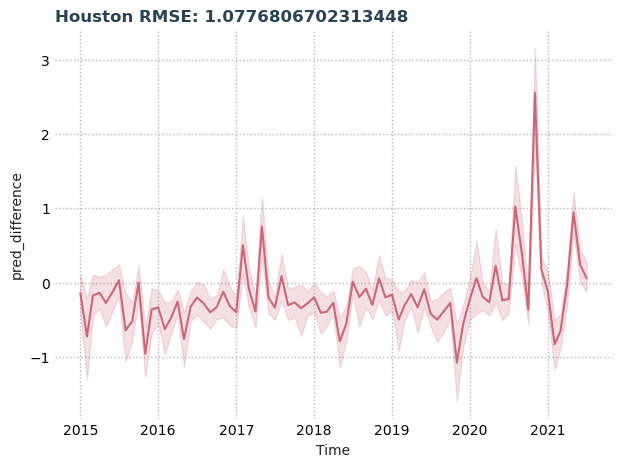

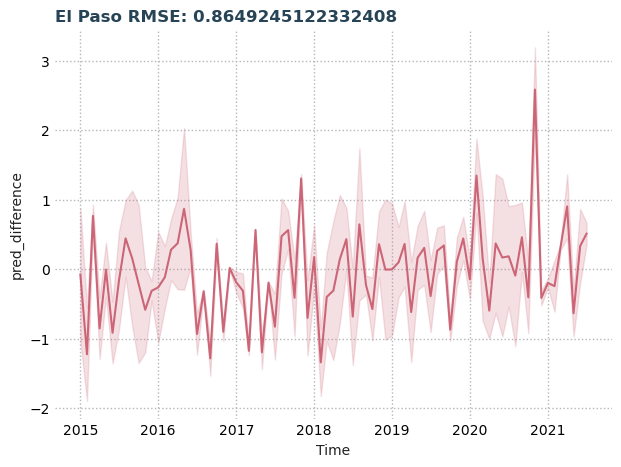

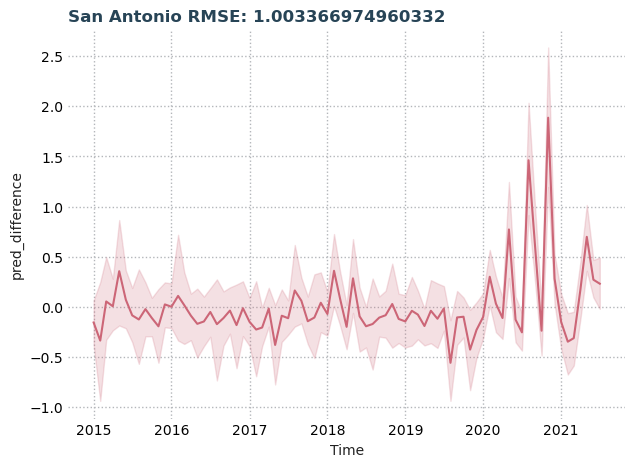

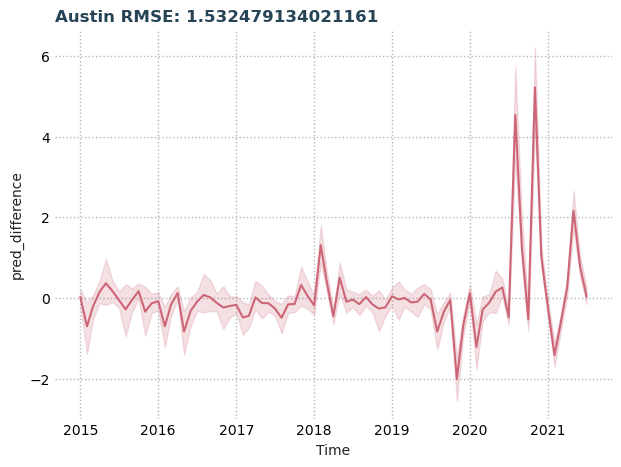

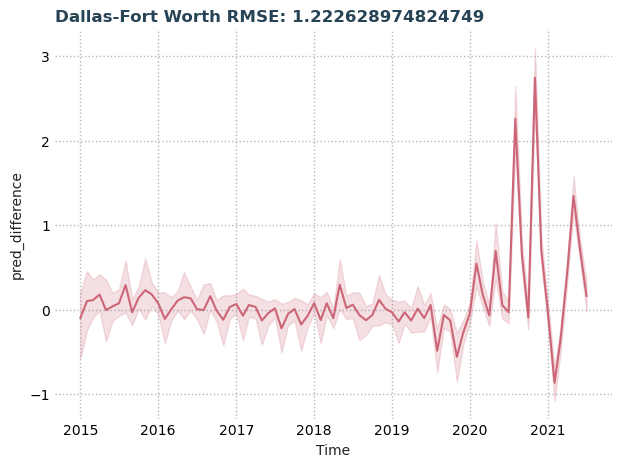

/Users/haydenlw4/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


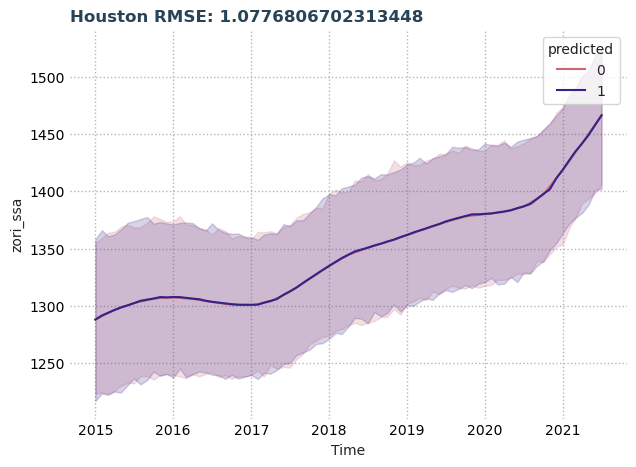

/Users/haydenlw4/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


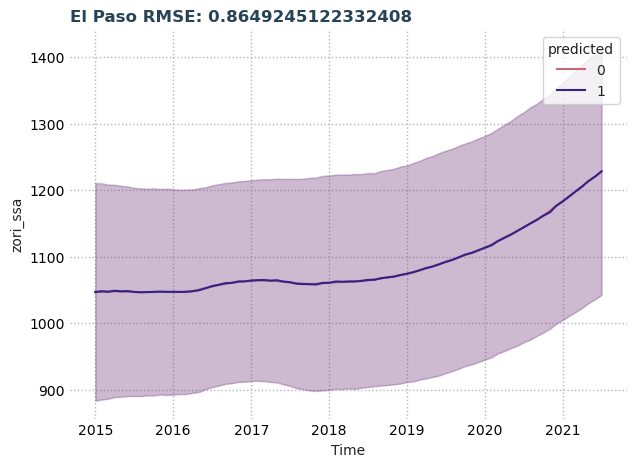

/Users/haydenlw4/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


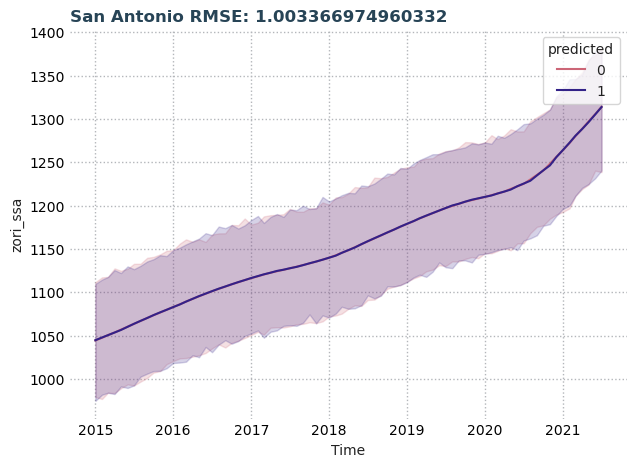

/Users/haydenlw4/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


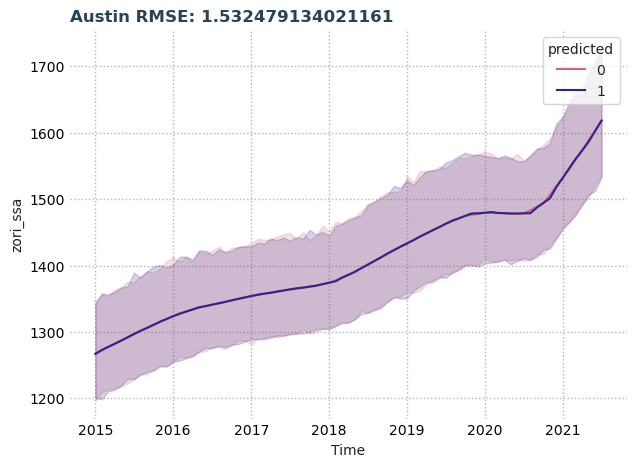

/Users/haydenlw4/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


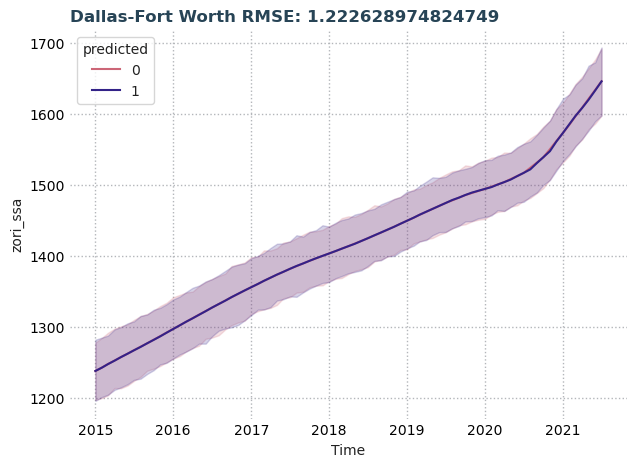

In [7]:
# zri_shift = 
zri_shift, X_vals = helper.time_lag_merge(zri, zri, {
    1:['zori_ssa'],
    2:['zori_ssa'],
    3:['zori_ssa'],
    4:['zori_ssa'],
    5:['zori_ssa'],
    6:['zori_ssa'],
    7:['zori_ssa'],
    8:['zori_ssa'],
    9:['zori_ssa'],
    10:['zori_ssa'],
    11:['zori_ssa'],
    12:['zori_ssa'],
},
                                          return_cols = True
                                         )
# dropping nas
zri_shift = zri_shift.dropna(axis='index',how = 'any').reset_index(drop = True)
# graphs.
# julies_graph
metros = list(zri.City.unique())
y_val = 'zori_ssa'
for metro in metros:
    train = zri_shift[zri_shift['City']!=metro].reset_index(drop=True)
    test = zri_shift[zri_shift['City']==metro].reset_index(drop=True)

    X_train = train[X_vals]
    y_train = train[y_val]

    X_test = test[X_vals]
    y_test = test[y_val]

    lm = LinearRegression()
    lm.fit(X_train,y_train)
    y_predicted = lm.predict(X_test)
    test.loc[:,'pred_difference'] = test.loc[:,y_val] - y_predicted

    y_predicted = lm.predict(X_test)
    rms = mean_squared_error(y_test, y_predicted, squared=False)

    g = sns.lineplot(data = test, x = 'Time',y = 'pred_difference')
    plt.title(f'{metro} RMSE: {rms}')
    plt.show()
    
# haydens version of julies graph
metros = list(zri.City.unique())
y_val = 'zori_ssa'
for metro in metros:
    train = zri_shift[zri_shift['City']!=metro].reset_index(drop=True)
    test = zri_shift[zri_shift['City']==metro].reset_index(drop=True)

    X_train = train[X_vals]
    y_train = train[y_val]

    X_test = test[X_vals]
    y_test = test[y_val]

    lm = LinearRegression()
    lm.fit(X_train,y_train)
    y_predicted = lm.predict(X_test)
    test.loc[:,'pred_difference'] = test.loc[:,y_val] - y_predicted

    rms = mean_squared_error(y_test, y_predicted, squared=False)

    test.loc[:,'pred'] = y_predicted
    graph_df1 = test[['Time',y_val]]
    graph_df1.loc[:,'predicted'] = 0 
    graph_df2 = test[['Time','pred']].rename(columns={'pred':y_val})
    graph_df2.loc[:,'predicted'] = 1
    graph_df = pd.concat([graph_df1,graph_df2]).reset_index(drop=True)

    g = sns.lineplot(data = graph_df, x = 'Time',y = y_val, hue = 'predicted')
    plt.title(f'{metro} RMSE: {rms}')
    plt.show()

#### shift 7-12 months

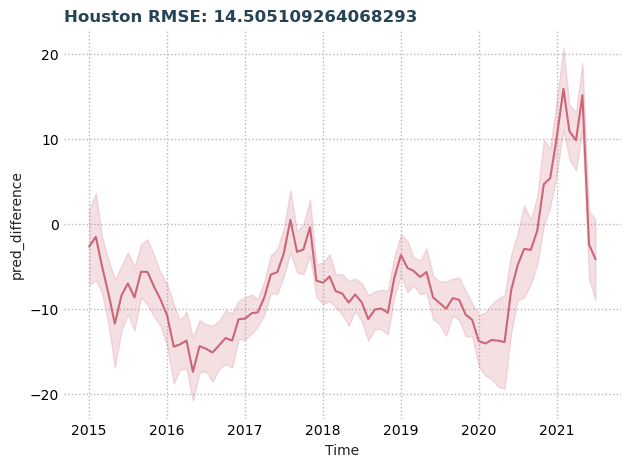

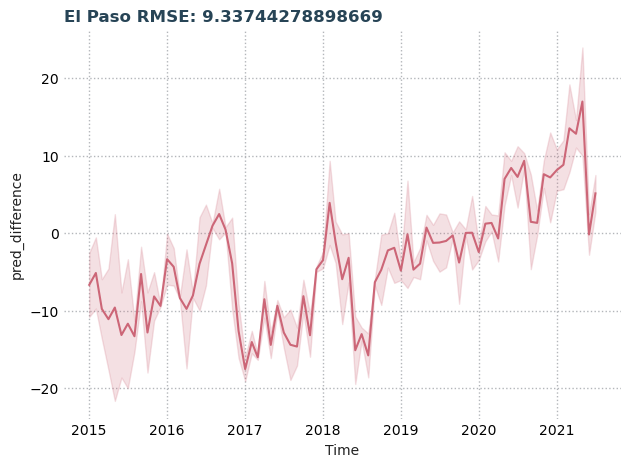

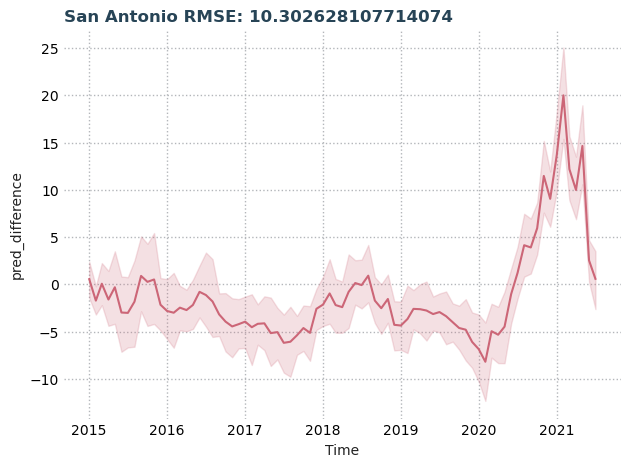

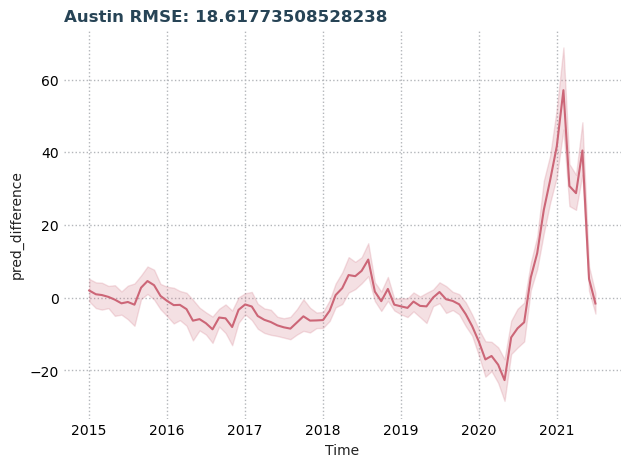

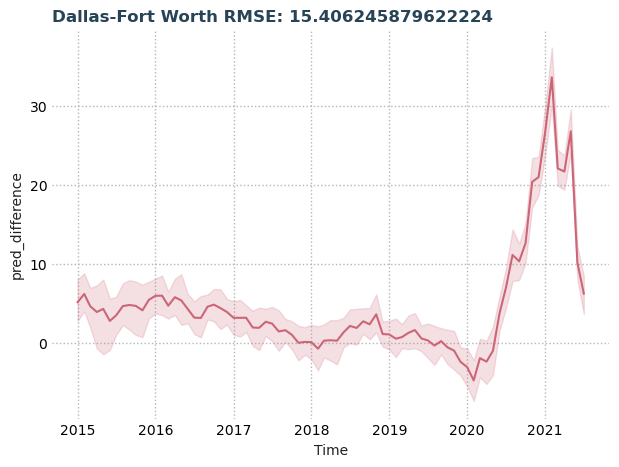

/Users/haydenlw4/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


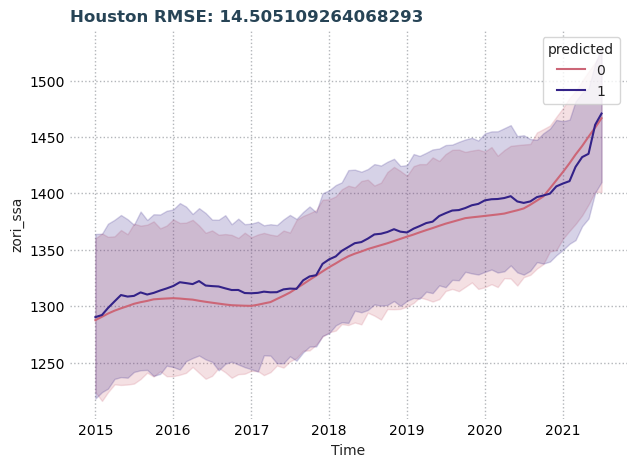

/Users/haydenlw4/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


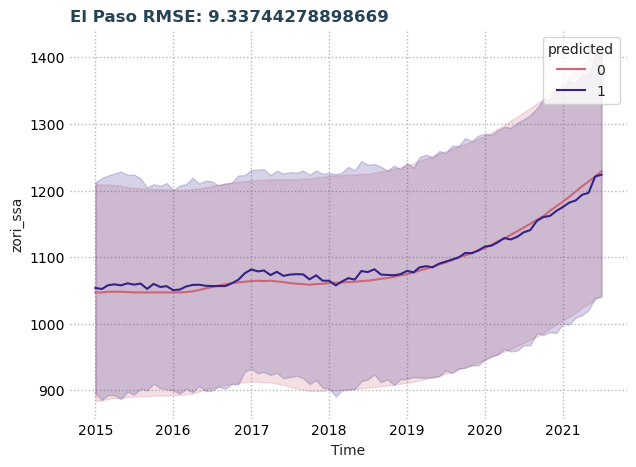

/Users/haydenlw4/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


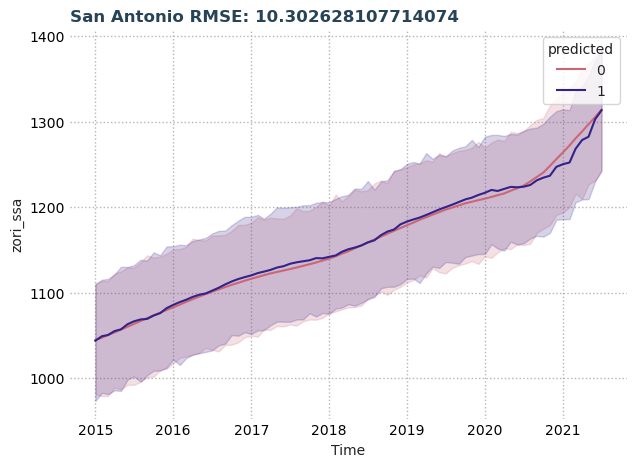

/Users/haydenlw4/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


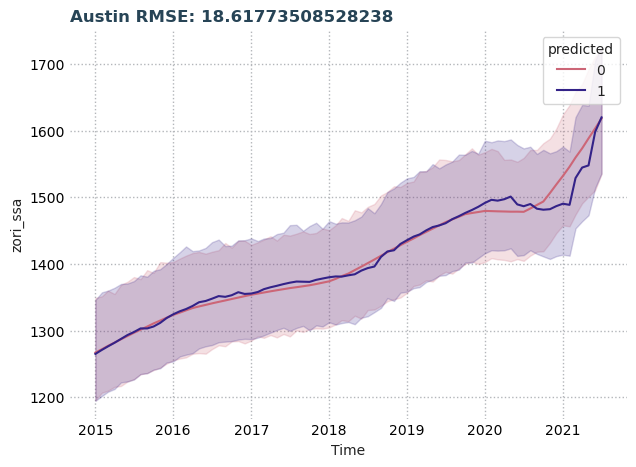

/Users/haydenlw4/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


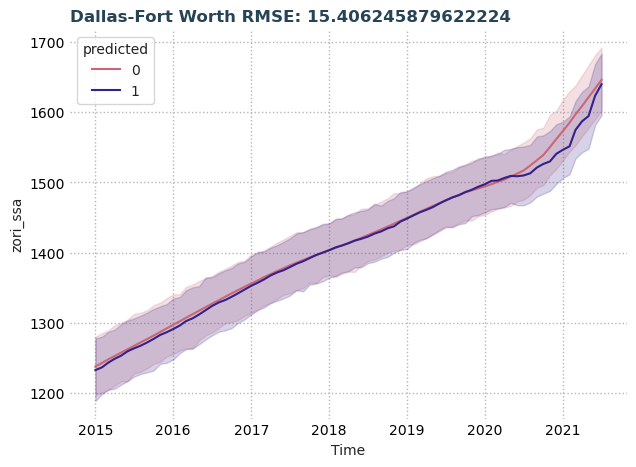

In [8]:
# zri_shift = 
zri_shift, X_vals = helper.time_lag_merge(zri, zri, {
    7:['zori_ssa'],
    8:['zori_ssa'],
    9:['zori_ssa'],
    10:['zori_ssa'],
    11:['zori_ssa'],
    12:['zori_ssa'],
},
                                          return_cols = True
                                         )
# dropping nas
zri_shift = zri_shift.dropna(axis='index',how = 'any').reset_index(drop = True)
# graphs.
# julies_graph
metros = list(zri.City.unique())
y_val = 'zori_ssa'
for metro in metros:
    train = zri_shift[zri_shift['City']!=metro].reset_index(drop=True)
    test = zri_shift[zri_shift['City']==metro].reset_index(drop=True)

    X_train = train[X_vals]
    y_train = train[y_val]

    X_test = test[X_vals]
    y_test = test[y_val]

    lm = LinearRegression()
    lm.fit(X_train,y_train)
    y_predicted = lm.predict(X_test)
    test.loc[:,'pred_difference'] = test.loc[:,y_val] - y_predicted

    y_predicted = lm.predict(X_test)
    rms = mean_squared_error(y_test, y_predicted, squared=False)

    g = sns.lineplot(data = test, x = 'Time',y = 'pred_difference')
    plt.title(f'{metro} RMSE: {rms}')
    plt.show()
    
# haydens version of julies graph
metros = list(zri.City.unique())
y_val = 'zori_ssa'
for metro in metros:
    train = zri_shift[zri_shift['City']!=metro].reset_index(drop=True)
    test = zri_shift[zri_shift['City']==metro].reset_index(drop=True)

    X_train = train[X_vals]
    y_train = train[y_val]

    X_test = test[X_vals]
    y_test = test[y_val]

    lm = LinearRegression()
    lm.fit(X_train,y_train)
    y_predicted = lm.predict(X_test)
    test.loc[:,'pred_difference'] = test.loc[:,y_val] - y_predicted

    rms = mean_squared_error(y_test, y_predicted, squared=False)

    test.loc[:,'pred'] = y_predicted
    graph_df1 = test[['Time',y_val]]
    graph_df1.loc[:,'predicted'] = 0 
    graph_df2 = test[['Time','pred']].rename(columns={'pred':y_val})
    graph_df2.loc[:,'predicted'] = 1
    graph_df = pd.concat([graph_df1,graph_df2]).reset_index(drop=True)

    g = sns.lineplot(data = graph_df, x = 'Time',y = y_val, hue = 'predicted')
    plt.title(f'{metro} RMSE: {rms}')
    plt.show()

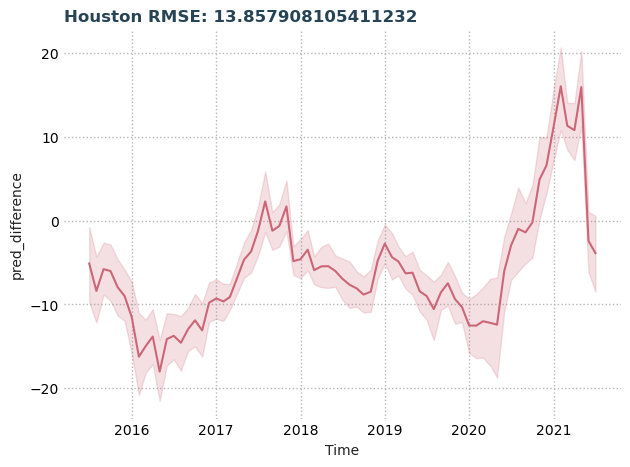

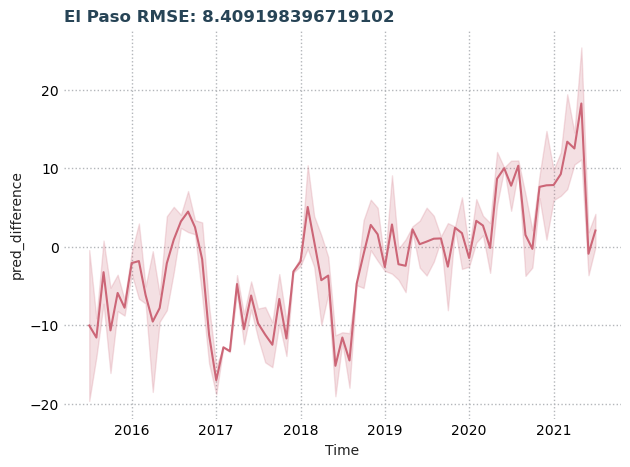

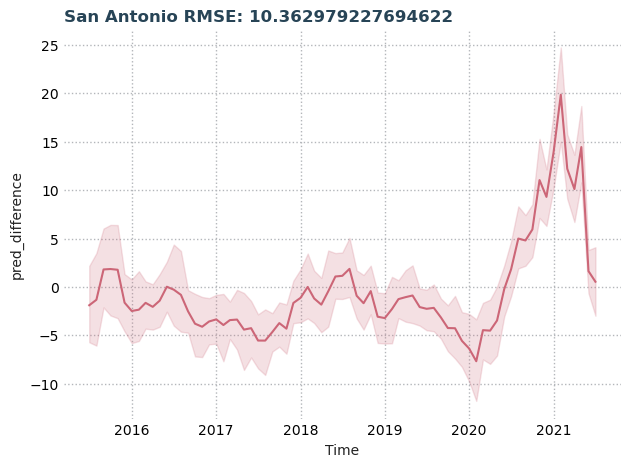

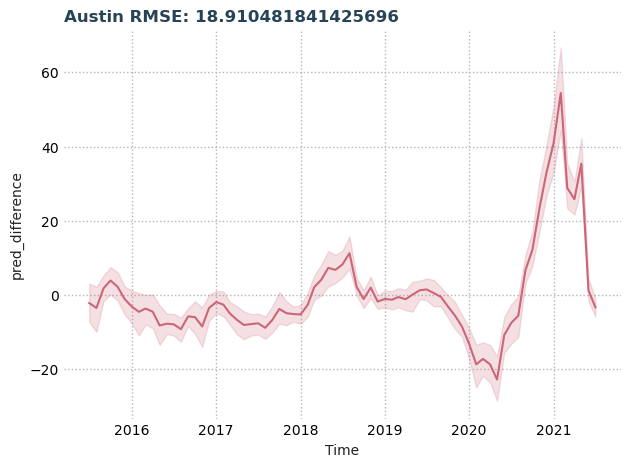

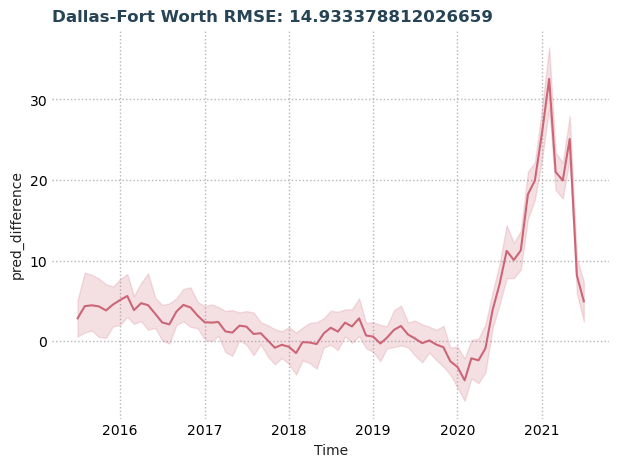

/Users/haydenlw4/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


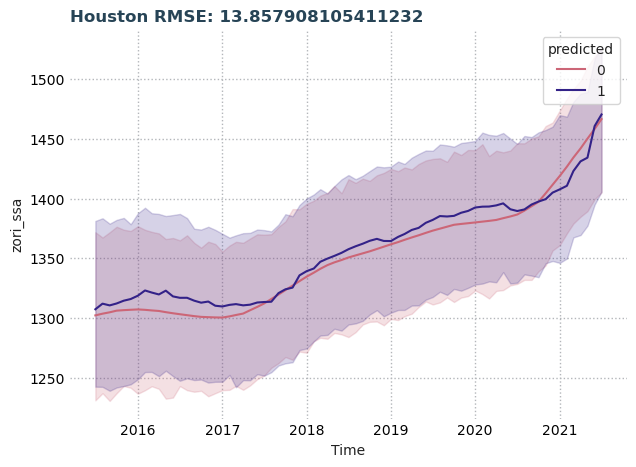

/Users/haydenlw4/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


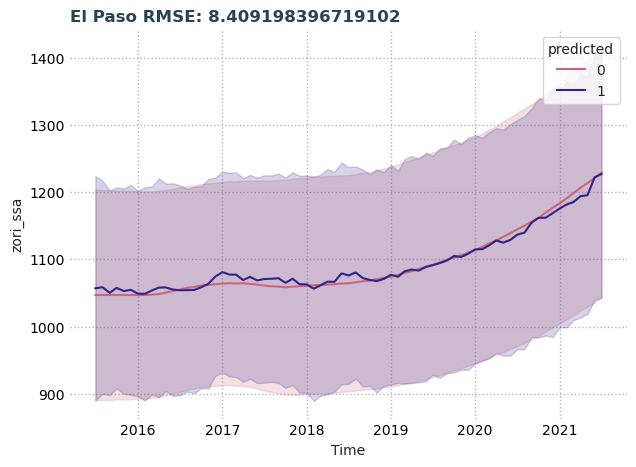

/Users/haydenlw4/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


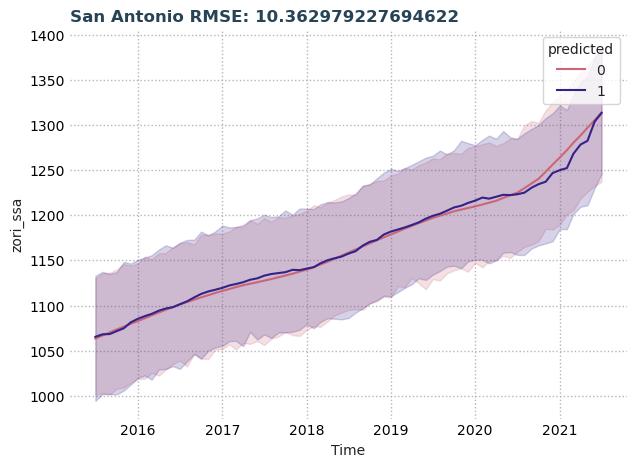

/Users/haydenlw4/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


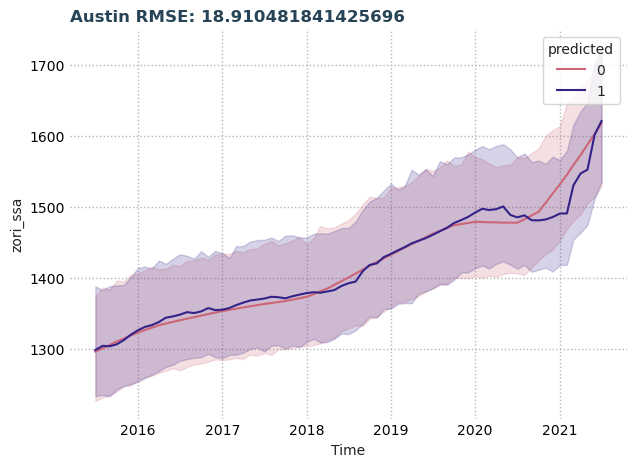

/Users/haydenlw4/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


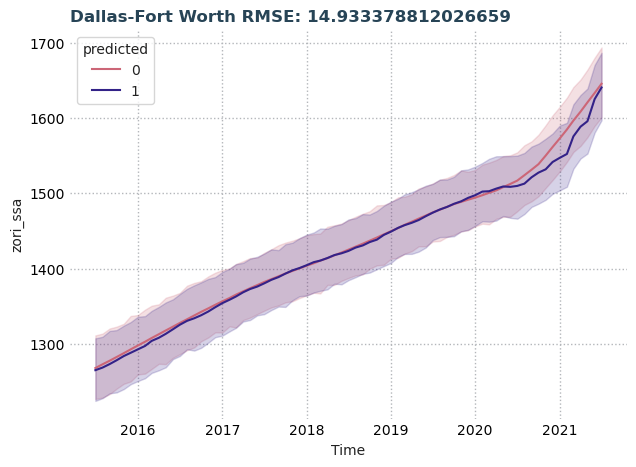

In [9]:
# zri_shift = 
zri_shift, X_vals = helper.time_lag_merge(zri, zri, {
    7:['zori_ssa'],
    8:['zori_ssa'],
    9:['zori_ssa'],
    10:['zori_ssa'],
    11:['zori_ssa'],
    12:['zori_ssa'],
    13:['zori_ssa'],
    14:['zori_ssa'],
    15:['zori_ssa'],
    16:['zori_ssa'],
    17:['zori_ssa'],
    18:['zori_ssa'],
},
                                          return_cols = True
                                         )
# dropping nas
zri_shift = zri_shift.dropna(axis='index',how = 'any').reset_index(drop = True)
# graphs.
# julies_graph
metros = list(zri.City.unique())
y_val = 'zori_ssa'
for metro in metros:
    train = zri_shift[zri_shift['City']!=metro].reset_index(drop=True)
    test = zri_shift[zri_shift['City']==metro].reset_index(drop=True)

    X_train = train[X_vals]
    y_train = train[y_val]

    X_test = test[X_vals]
    y_test = test[y_val]

    lm = LinearRegression()
    lm.fit(X_train,y_train)
    y_predicted = lm.predict(X_test)
    test.loc[:,'pred_difference'] = test.loc[:,y_val] - y_predicted

    y_predicted = lm.predict(X_test)
    rms = mean_squared_error(y_test, y_predicted, squared=False)

    g = sns.lineplot(data = test, x = 'Time',y = 'pred_difference')
    plt.title(f'{metro} RMSE: {rms}')
    plt.show()
    
# haydens version of julies graph
metros = list(zri.City.unique())
y_val = 'zori_ssa'
for metro in metros:
    train = zri_shift[zri_shift['City']!=metro].reset_index(drop=True)
    test = zri_shift[zri_shift['City']==metro].reset_index(drop=True)

    X_train = train[X_vals]
    y_train = train[y_val]

    X_test = test[X_vals]
    y_test = test[y_val]

    lm = LinearRegression()
    lm.fit(X_train,y_train)
    y_predicted = lm.predict(X_test)
    test.loc[:,'pred_difference'] = test.loc[:,y_val] - y_predicted

    rms = mean_squared_error(y_test, y_predicted, squared=False)

    test.loc[:,'pred'] = y_predicted
    graph_df1 = test[['Time',y_val]]
    graph_df1.loc[:,'predicted'] = 0 
    graph_df2 = test[['Time','pred']].rename(columns={'pred':y_val})
    graph_df2.loc[:,'predicted'] = 1
    graph_df = pd.concat([graph_df1,graph_df2]).reset_index(drop=True)

    g = sns.lineplot(data = graph_df, x = 'Time',y = y_val, hue = 'predicted')
    plt.title(f'{metro} RMSE: {rms}')
    plt.show()

#### Gridsearch lasso with 1-12 months

Performing Grid Search with alphas of: [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1]
Current best alpha: 0.0001
Current best CV R2: 0.9999345402469197
Performing Grid Search with alphas of: [3.0e-05 4.0e-05 5.0e-05 6.0e-05 7.0e-05 8.0e-05 9.0e-05 1.0e-04 1.1e-04
 1.2e-04 1.3e-04 1.4e-04 1.5e-04 1.6e-04 1.7e-04 1.8e-04 1.9e-04]
Current best alpha: 3e-05
Current best CV R2: 0.9999346512564145
Modeling complete :)


/Users/haydenlw4/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


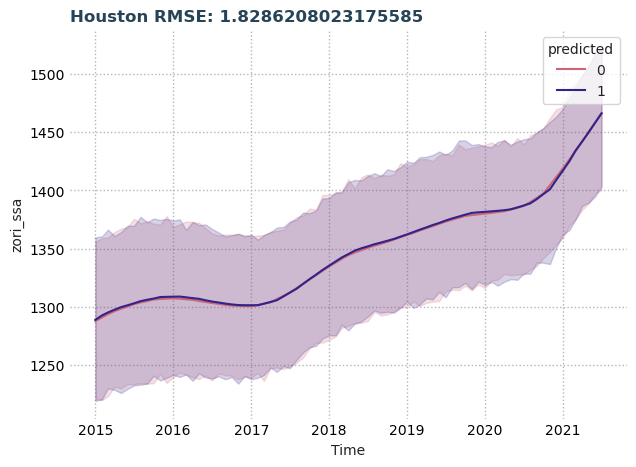

Performing Grid Search with alphas of: [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1]
Current best alpha: 0.0001
Current best CV R2: 0.9999349084784116
Performing Grid Search with alphas of: [3.0e-05 4.0e-05 5.0e-05 6.0e-05 7.0e-05 8.0e-05 9.0e-05 1.0e-04 1.1e-04
 1.2e-04 1.3e-04 1.4e-04 1.5e-04 1.6e-04 1.7e-04 1.8e-04 1.9e-04]
Current best alpha: 3e-05
Current best CV R2: 0.9999349954524959
Modeling complete :)


/Users/haydenlw4/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


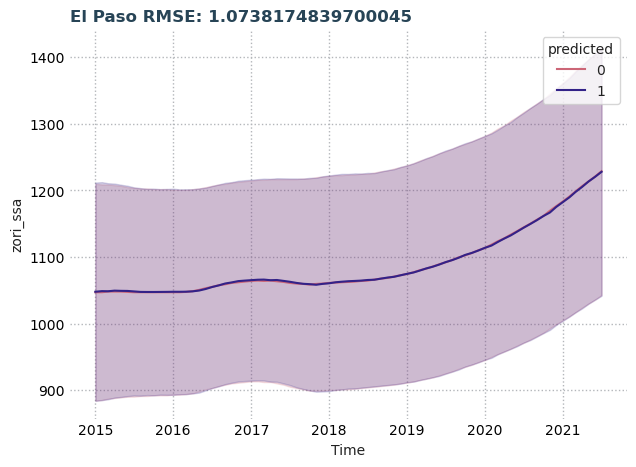

Performing Grid Search with alphas of: [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1]
Current best alpha: 0.0001
Current best CV R2: 0.9999266701432228
Performing Grid Search with alphas of: [3.0e-05 4.0e-05 5.0e-05 6.0e-05 7.0e-05 8.0e-05 9.0e-05 1.0e-04 1.1e-04
 1.2e-04 1.3e-04 1.4e-04 1.5e-04 1.6e-04 1.7e-04 1.8e-04 1.9e-04]
Current best alpha: 3e-05
Current best CV R2: 0.9999267429121705
Modeling complete :)


/Users/haydenlw4/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


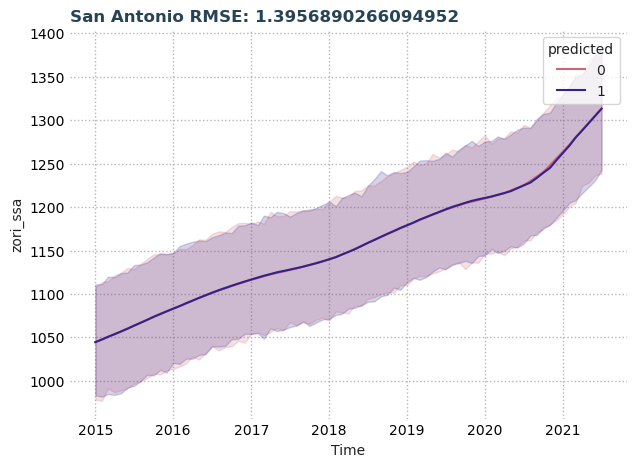

Performing Grid Search with alphas of: [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1]
Current best alpha: 0.0001
Current best CV R2: 0.9999382283399207
Performing Grid Search with alphas of: [3.0e-05 4.0e-05 5.0e-05 6.0e-05 7.0e-05 8.0e-05 9.0e-05 1.0e-04 1.1e-04
 1.2e-04 1.3e-04 1.4e-04 1.5e-04 1.6e-04 1.7e-04 1.8e-04 1.9e-04]
Current best alpha: 3e-05
Current best CV R2: 0.9999383423363607
Modeling complete :)


/Users/haydenlw4/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


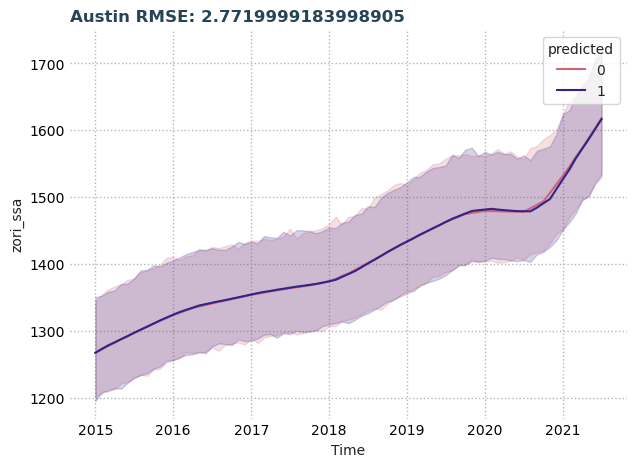

Performing Grid Search with alphas of: [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1]
Current best alpha: 0.0001
Current best CV R2: 0.999932856363162
Performing Grid Search with alphas of: [3.0e-05 4.0e-05 5.0e-05 6.0e-05 7.0e-05 8.0e-05 9.0e-05 1.0e-04 1.1e-04
 1.2e-04 1.3e-04 1.4e-04 1.5e-04 1.6e-04 1.7e-04 1.8e-04 1.9e-04]
Current best alpha: 3e-05
Current best CV R2: 0.9999329349489635
Modeling complete :)


/Users/haydenlw4/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


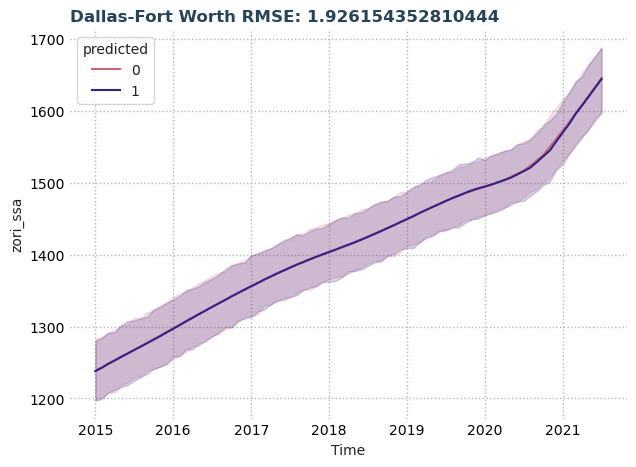

In [20]:
zri_shift, X_vals = helper.time_lag_merge(zri, zri, {
    1:['zori_ssa'],
    2:['zori_ssa'],
    3:['zori_ssa'],
    4:['zori_ssa'],
    5:['zori_ssa'],
    6:['zori_ssa'],
    7:['zori_ssa'],
    8:['zori_ssa'],
    9:['zori_ssa'],
    10:['zori_ssa'],
    11:['zori_ssa'],
    12:['zori_ssa'],
},
                                          return_cols = True
                                         )
# dropping nas
zri_shift = zri_shift.dropna(axis='index',how = 'any').reset_index(drop = True)
# graphs.
# julies_graph
metros = list(zri.City.unique())
y_val = 'zori_ssa'


# haydens version of julies graph
metros = list(zri.City.unique())
y_val = 'zori_ssa'
for metro in metros:
    train = zri_shift[zri_shift['City']!=metro].reset_index(drop=True)
    test = zri_shift[zri_shift['City']==metro].reset_index(drop=True)

    clf, transformer, scaler, clf1 = helper.lasso_grid_cv(train, y_val, X_vals, cat_feats_=[],
                      starting_alphas_=[0.0001, 0.0003, 0.0006, 0.001, 
                                        0.003, 0.006, 0.01, 0.03, 0.06, 0.1,
                                        0.3, 0.6, 1],
                      n_jobs_ = None,
                      cv_ = 5
                     )
    X_test = test[X_vals]
    X_test = transformer.transform(X_test)
    X_test = scaler.transform(X_test)
    y_test = test[y_val]
    y_predicted = clf.predict(X_test)
    test.loc[:,'pred_difference'] = test.loc[:,y_val] - y_predicted

    rms = mean_squared_error(y_test, y_predicted, squared=False)

    test.loc[:,'pred'] = y_predicted
    graph_df1 = test[['Time',y_val]]
    graph_df1.loc[:,'predicted'] = 0 
    graph_df2 = test[['Time','pred']].rename(columns={'pred':y_val})
    graph_df2.loc[:,'predicted'] = 1
    graph_df = pd.concat([graph_df1,graph_df2]).reset_index(drop=True)

    g = sns.lineplot(data = graph_df, x = 'Time',y = y_val, hue = 'predicted')
    plt.title(f'{metro} RMSE: {rms}')
    plt.show()


#### gridsearch lasso with 7-12 months

In [7]:
zri_shift, X_vals = helper.time_lag_merge(zri, zri, {
#     1:['zori_ssa'],
#     2:['zori_ssa'],
#     3:['zori_ssa'],
#     4:['zori_ssa'],
#     5:['zori_ssa'],
#     6:['zori_ssa'],
    7:['zori_ssa'],
    8:['zori_ssa'],
    9:['zori_ssa'],
    10:['zori_ssa'],
    11:['zori_ssa'],
    12:['zori_ssa'],
},
                                          return_cols = True
                                         )
# dropping nas
zri_shift = zri_shift.dropna(axis='index',how = 'any').reset_index(drop = True)
# graphs.
# julies_graph
metros = list(zri.City.unique())
y_val = 'zori_ssa'


# haydens version of julies graph
metros = list(zri.City.unique())
y_val = 'zori_ssa'
for metro in metros:
    train = zri_shift[zri_shift['City']!=metro].reset_index(drop=True)
    test = zri_shift[zri_shift['City']==metro].reset_index(drop=True)

    clf, transformer, scaler, clf1 = helper.lasso_grid_cv(train, y_val, X_vals, cat_feats_=[],
                      starting_alphas_=[0.0001, 0.0003, 0.0006, 0.001, 
                                        0.003, 0.006, 0.01, 0.03, 0.06, 0.1,
                                        0.3, 0.6, 1],
                      n_jobs_ = -1,
                      cv_ = 3
                     )
    X_test = test[X_vals]
    X_test = transformer.transform(X_test)
    X_test = scaler.transform(X_test)
    y_test = test[y_val]
    y_predicted = clf.predict(X_test)
    test.loc[:,'pred_difference'] = test.loc[:,y_val] - y_predicted

    rms = mean_squared_error(y_test, y_predicted, squared=False)

    test.loc[:,'pred'] = y_predicted
    graph_df1 = test[['Time',y_val]]
    graph_df1.loc[:,'predicted'] = 0 
    graph_df2 = test[['Time','pred']].rename(columns={'pred':y_val})
    graph_df2.loc[:,'predicted'] = 1
    graph_df = pd.concat([graph_df1,graph_df2]).reset_index(drop=True)

    g = sns.lineplot(data = graph_df, x = 'Time',y = y_val, hue = 'predicted')
    plt.title(f'{metro} RMSE: {rms}')
    plt.show()



In [9]:
metros = list(zri.City.unique())
metros


['Houston', 'El Paso', 'San Antonio', 'Austin', 'Dallas-Fort Worth']

Performing Grid Search with alphas of: [0.0001, 0.0001, 0.001, 0.01, 0.1, 0.3, 0.6, 1]


/Users/haydenlw4/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1305593.930065472, tolerance: 91487.57294671067
  model = cd_fast.enet_coordinate_descent(
/Users/haydenlw4/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


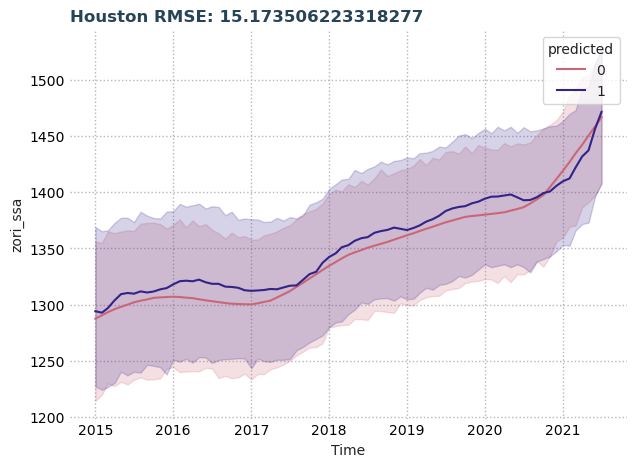

Performing Grid Search with alphas of: [0.0001, 0.0001, 0.001, 0.01, 0.1, 0.3, 0.6, 1]


/Users/haydenlw4/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1574343.533448239, tolerance: 103305.28533492777
  model = cd_fast.enet_coordinate_descent(
/Users/haydenlw4/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


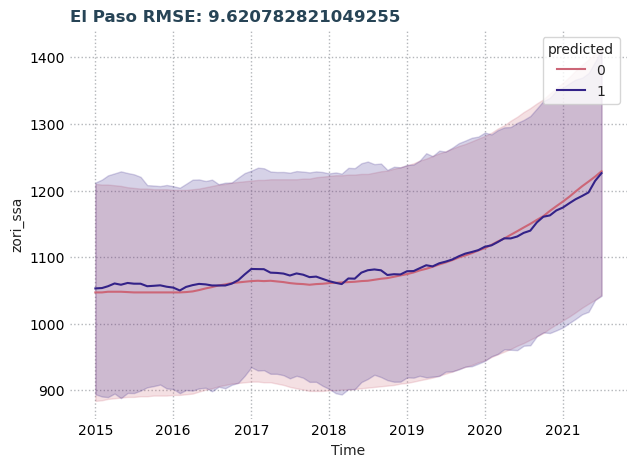

Performing Grid Search with alphas of: [0.0001, 0.0001, 0.001, 0.01, 0.1, 0.3, 0.6, 1]


/Users/haydenlw4/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1480510.6933205544, tolerance: 83065.45622438916
  model = cd_fast.enet_coordinate_descent(
/Users/haydenlw4/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


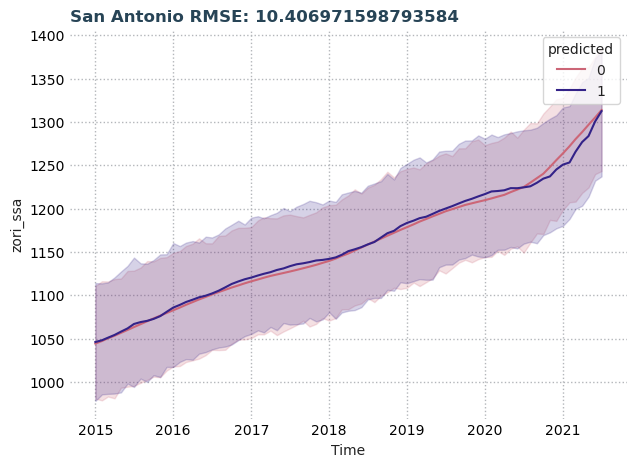

Performing Grid Search with alphas of: [0.0001, 0.0001, 0.001, 0.01, 0.1, 0.3, 0.6, 1]


/Users/haydenlw4/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1128302.0918165776, tolerance: 83573.7385720124
  model = cd_fast.enet_coordinate_descent(
/Users/haydenlw4/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


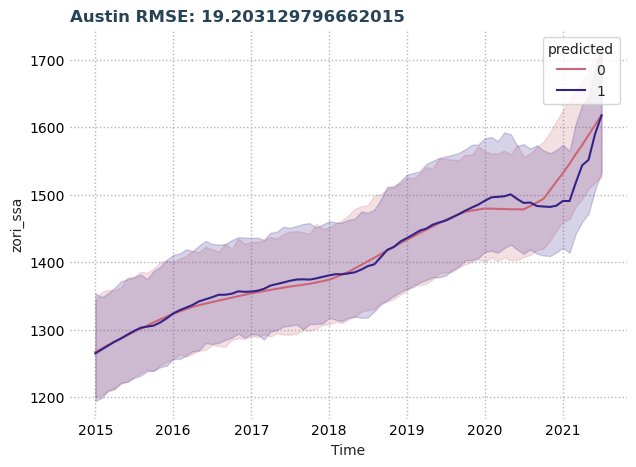

Performing Grid Search with alphas of: [0.0001, 0.0001, 0.001, 0.01, 0.1, 0.3, 0.6, 1]


/Users/haydenlw4/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 775319.5729878114, tolerance: 54165.2063927276
  model = cd_fast.enet_coordinate_descent(
/Users/haydenlw4/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


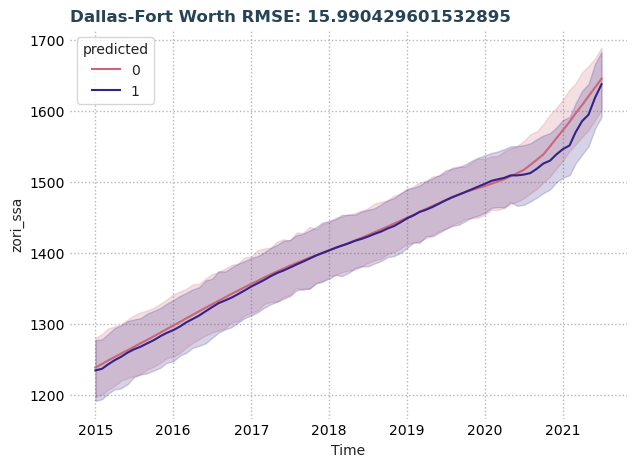

In [8]:
zri_shift, X_vals = helper.time_lag_merge(zri, zri, {
    7:['zori_ssa'],
    8:['zori_ssa'],
    9:['zori_ssa'],
    10:['zori_ssa'],
    11:['zori_ssa'],
    12:['zori_ssa'],
},
                                          return_cols = True
                                         )

zri_shift = zri_shift.dropna(axis='index',how = 'any').reset_index(drop = True)


# haydens version of julies graph
metros = list(zri.City.unique())
y_val = 'zori_ssa'
for metro in metros:
    train = zri_shift[zri_shift['City']!=metro].reset_index(drop=True)
    test = zri_shift[zri_shift['City']==metro].reset_index(drop=True)
    cat_feats_=[]

    scaler = StandardScaler(with_mean=False)
    lasso = Lasso(max_iter = 50000, random_state = 33)

    X = train[X_vals]
    transformer = ColumnTransformer([("Cat", 
                                      OneHotEncoder(handle_unknown = 'ignore'), 
                                      cat_feats_)], remainder='passthrough')
    X = transformer.fit_transform(X)
    X = scaler.fit_transform(X)
    y = train[y_val]

    # Grid Search set up.

    alphas = [0.0001, 0.0001, 0.001, 0.01, 0.1, 0.3, 0.6, 1]
    tuned_parameters = [{'alpha': alphas}]
    print(f'Performing Grid Search with alphas of: {alphas}')
    clf = GridSearchCV(lasso, tuned_parameters, 
                        cv=3,n_jobs = -1,
                      scoring = 'neg_root_mean_squared_error')
    best_alpha = clf.best_params_['alpha']
    clf.fit(X, y)
    
    X_test = test[X_vals]
    X_test = transformer.transform(X_test)
    X_test = scaler.transform(X_test)
    y_test = test[y_val]
    y_predicted = clf.predict(X_test)
    test.loc[:,'pred_difference'] = test.loc[:,y_val] - y_predicted

    rms = mean_squared_error(y_test, y_predicted, squared=False)
    test.loc[:,'pred'] = y_predicted
    graph_df1 = test[['Time',y_val]]
    graph_df1.loc[:,'predicted'] = 0 
    graph_df2 = test[['Time','pred']].rename(columns={'pred':y_val})
    graph_df2.loc[:,'predicted'] = 1
    graph_df = pd.concat([graph_df1,graph_df2]).reset_index(drop=True)

    g = sns.lineplot(data = graph_df, x = 'Time',y = y_val, hue = 'predicted')
    plt.title(f'{metro} RMSE: {rms}')
    plt.show()

In [16]:
zri_shift, X_vals = helper.time_lag_merge(zri, zri, {
    7:['zori_ssa'],
    8:['zori_ssa'],
    9:['zori_ssa'],
    10:['zori_ssa'],
    11:['zori_ssa'],
    12:['zori_ssa'],
},
                                          return_cols = True
                                         )

In [17]:
zri_shift, X_vals_econ = helper.time_lag_merge(zri, econ, return_cols = True)

In [19]:
X_vals = X_vals_econ+X_vals

Performing Grid Search with alphas of: [0.0001, 0.0001, 0.001, 0.01, 0.1, 0.3, 0.6, 1]


/Users/haydenlw4/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 818946.8407929385, tolerance: 81726.63637601367
  model = cd_fast.enet_coordinate_descent(
/Users/haydenlw4/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


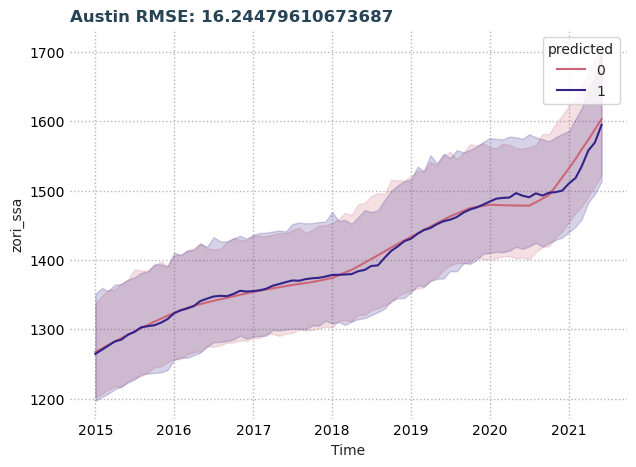

In [23]:
zri_shift, X_vals = helper.time_lag_merge(zri, zri, {
    7:['zori_ssa'],
    8:['zori_ssa'],
    9:['zori_ssa'],
    10:['zori_ssa'],
    11:['zori_ssa'],
    12:['zori_ssa'],
},
                                          return_cols = True
                                         )
zri_shift, X_vals_econ = helper.time_lag_merge(zri_shift, econ.drop(['State'],axis=1), return_cols = True)

X_vals = X_vals_econ+X_vals

zri_shift = zri_shift.dropna(axis='index',how = 'any').reset_index(drop = True)


# haydens version of julies graph
metros = list(zri.City.unique())
y_val = 'zori_ssa'
metro = 'Austin'
# for metro in metros:
train = zri_shift[zri_shift['City']!=metro].reset_index(drop=True)
test = zri_shift[zri_shift['City']==metro].reset_index(drop=True)
cat_feats_=[]

scaler = StandardScaler(with_mean=False)
lasso = Lasso(max_iter = 50000, random_state = 33)

X = train[X_vals]
transformer = ColumnTransformer([("Cat", 
                                  OneHotEncoder(handle_unknown = 'ignore'), 
                                  cat_feats_)], remainder='passthrough')
X = transformer.fit_transform(X)
X = scaler.fit_transform(X)
y = train[y_val]

# Grid Search set up.

alphas = [0.0001, 0.0001, 0.001, 0.01, 0.1, 0.3, 0.6, 1]
tuned_parameters = [{'alpha': alphas}]
print(f'Performing Grid Search with alphas of: {alphas}')
clf = GridSearchCV(lasso, tuned_parameters, 
                    cv=3,n_jobs = -1,
                  scoring = 'neg_root_mean_squared_error')
# best_alpha = clf.best_params_['alpha']
clf.fit(X, y)

X_test = test[X_vals]
X_test = transformer.transform(X_test)
X_test = scaler.transform(X_test)
y_test = test[y_val]
y_predicted = clf.predict(X_test)
test.loc[:,'pred_difference'] = test.loc[:,y_val] - y_predicted

rms = mean_squared_error(y_test, y_predicted, squared=False)
test.loc[:,'pred'] = y_predicted
graph_df1 = test[['Time',y_val]]
graph_df1.loc[:,'predicted'] = 0 
graph_df2 = test[['Time','pred']].rename(columns={'pred':y_val})
graph_df2.loc[:,'predicted'] = 1
graph_df = pd.concat([graph_df1,graph_df2]).reset_index(drop=True)

g = sns.lineplot(data = graph_df, x = 'Time',y = y_val, hue = 'predicted')
plt.title(f'{metro} RMSE: {rms}')
plt.show()

In [25]:
clf.best_estimator_.coef_

array([ 1.40030077e+00, -9.15430035e+00,  0.00000000e+00, -5.93853678e+00,
        1.11741442e+00, -7.26232191e-02,  1.91466086e-01, -2.93763758e-01,
       -1.25321612e+00, -1.44178129e+00,  3.16736040e-01,  1.64200034e+00,
        2.81163301e-02, -1.43918603e+01, -6.58073350e+00,  4.24163288e-02,
       -4.71136419e-02, -5.95544142e-01,  7.03913306e-01,  9.75206273e-01,
        3.99790294e+00,  2.16352803e+00, -4.75830672e+00,  0.00000000e+00,
       -8.14602415e-03,  2.16507466e-02,  1.05879994e+01, -3.79135776e+02,
       -3.53276151e+02, -5.11429554e+01,  5.82662765e+02, -6.64885650e+02,
        1.10705997e+03])

In [31]:
coef_df = pd.DataFrame({'features':test[X_vals].columns,'coefs':clf.best_estimator_.coef_})
coef_df = coef_df[coef_df['coefs']!=0]
coef_df['coefs_abs'] = abs(coef_df['coefs'])
coef_df = coef_df.sort_values('coefs_abs',ascending=False).reset_index(drop=True)
coef_df

,features,coefs,coefs_abs
0,zori_ssa_7_month_shift,1107.059969,1107.059969
1,zori_ssa_9_month_shift,-664.885650,664.885650
2,zori_ssa_12_month_shift,582.662765,582.662765
3,zori_ssa_11_month_shift,-379.135776,379.135776
4,zori_ssa_10_month_shift,-353.276151,353.276151
5,zori_ssa_8_month_shift,-51.142955,51.142955
6,Unemployment U.S.,-14.391860,14.391860
7,Consumer Price Index TX,10.587999,10.587999
8,Consumer Price Index U.S.,-9.154300,9.154300
9,Nonfarm Employment U.S.,-6.580734,6.580734


In [30]:
test[X_vals].columns

Index(['Gross Value Natural Gas Production', 'Consumer Price Index U.S.',
       'Gross Value Crude Oil Production', 'Nonfarm Employment New York',
       'Consumer Confidence West South Central',
       'Consumer Confidence Index US', 'Single Family Building Permits TX',
       'Total Sales Tax Collections Retail TX',
       'Existing Single Family Home Sales TX', 'Consumer Confidence Index TX',
       'Total Sales Tax Collections TX', 'Nonfarm Employment TX',
       'Retail Gasoline Price TX', 'Unemployment U.S.',
       'Nonfarm Employment U.S.', 'Motor Fuel Taxed Diesel',
       'Non Residential Building Construction', 'Retail Diesel Price TX',
       'Nonfarm Employment Texas', 'Nonfarm Employment Florida',
       'Existing Single Family Home Price TX', 'Unemployment TX',
       'Nonfarm Employment California', 'Nonfarm Employment Illinois',
       'Motor Fuel Taxed Gasoline', 'Multi Family Building Permits TX',
       'Consumer Price Index TX', 'zori_ssa_11_month_shift',
       '